In [23]:
# import numpy as np
# import soundfile as sf

# # 定义参数
# input_file = "irenie_merge_final_01.wav" # 输入文件名
# output_file = "tmp_output.wav" # 输出文件名
# threshold = 0.1 # 阈值，声音低于该值的片段将被剪切
# min_silence_duration = 2 # 最小的沉默时长（以秒为单位），如果低于该值，则不进行剪切
# sample_rate = 44100 # 采样率

# # 读取音频文件
# data, sr = sf.read(input_file)

# # 计算音频文件中每个样本的能量值
# energy = np.sum(np.abs(data) ** 2, axis=1)

# # 根据阈值将音频分割成片段
# segments = np.split(data, np.where(energy > threshold)[0])

# # 根据最小的沉默时长剪切片段
# new_segments = []
# for segment in segments:
#     if len(segment) > min_silence_duration * sample_rate:
#         new_segments.append(segment)

# # 合并所有有效的片段
# output_data = np.concatenate(new_segments)

# # 将结果保存到输出文件中
# sf.write(output_file, output_data, sample_rate)


In [24]:
import subprocess
import wave
import matplotlib.pyplot as plt

def visualize(path: str,sil=None):
    raw = wave.open(path)
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    f_rate = raw.getframerate()
    time = np.linspace(
        0, # start
        len(signal) / f_rate/2,
        num = len(signal)
    )
    print(len(signal), f_rate)
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red') 
            plt.axvline(x=i[1], color='red')
    plt.show()

ffmpeg -i output1.wav -af silencedetect=n=-23dB:d=2 -f null -
[(48.222, 51.1827), (72.2417, 75.5985)]
14111990 44100


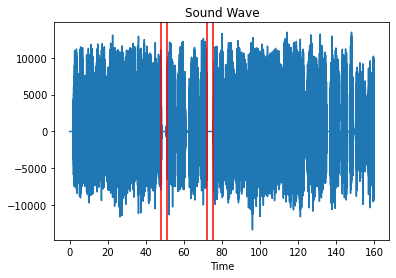

In [32]:
def detect_silence(path,time):
    '''
    This function is a python wrapper to run the ffmpeg command in python and extranct the desired output
    
    path= Audio file path
    time = silence time threshold
    
    returns = list of tuples with start and end point of silences
    
    '''
    command="ffmpeg -i "+path+" -af silencedetect=n=-23dB:d="+str(time)+" -f null -"
    out = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    stdout, stderr = out.communicate()
    s=stdout.decode("utf-8")
    k=s.split('[silencedetect @')
    if len(k)==1:
        #print(stderr)
        return None
        
    start,end=[],[]
    for i in range(1,len(k)):
        x=k[i].split(']')[1]
        if i%2==0:
            x=x.split('|')[0]
            x=x.split(':')[1].strip()
            end.append(float(x))
        else:
            x=x.split(':')[1]
            x=x.split('size')[0]
            x=x.replace('\r','')
            x=x.replace('\n','').strip()
            start.append(float(x))
    print(command)
    return list(zip(start,end))

file = 'output1.wav'
lst=detect_silence(file,2)
print(lst)
if lst:
    visualize(file,lst)

In [27]:
!ffmpeg -i irenie_merge_final_01.wav -af silenceremove=stop_periods=-1:stop_duration=5:stop_threshold=-23dB -f null -


ffmpeg version 4.2.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9.3.1 (GCC) 20200523
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-amf --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt
  libavutil      56. 31.100 / 56. 31.100
  li